In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

En esta sesión veremos cómo trabajar aspectos de planaridad y gráficas dirigidas usando la librería NetworkX.

# DFS y BFS

Como las gráficas ahora son dirigidas, hay que tomar en consideración la dirección de las aristas si queremos recorrerlas con DFS o BFS. Por suerte, en el caso de gráficas dirigidas, `g.adj[i]` solo regresa los vértices sucesores de `i`:

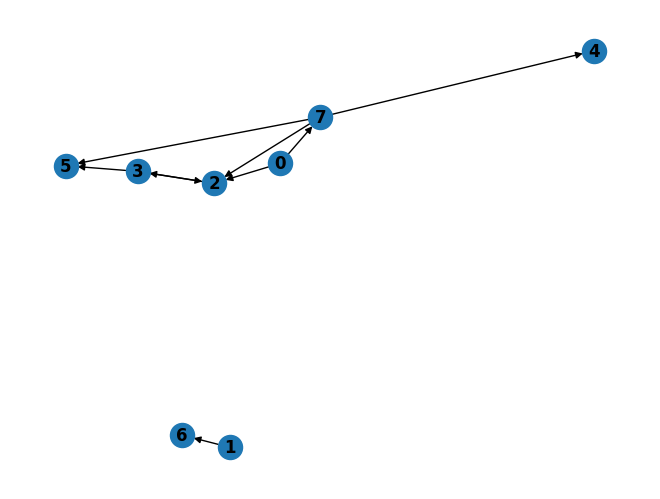

In [3]:
G = nx.gnp_random_graph(8, 0.2, directed=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [4]:
print(f"Vértices adyacentes a 0: {G.adj[0]}")

Vértices adyacentes a 0: {2: {}, 7: {}}


De esta manera, podemos utilizar los algoritmos de DFS y BFS que escribimos en libretas pasadas sin hacer ningún cambio:

In [5]:
def dfs(g, v, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        y
    visited[v] = True
    print(v)
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited)


def bfs(g, v):
    visited = [False] * len(g.nodes)
    q = deque()
    visited[v] = True
    q.append(v)

    while(q):
        u = q.popleft()
        print(u)
        for w in g.adj[u]:
            if not visited[w]:
                visited[w] = True
                q.append(w)

# Propiedades

`networkx` tiene varias funciones para obtener distintas propiedades de las gráficas:

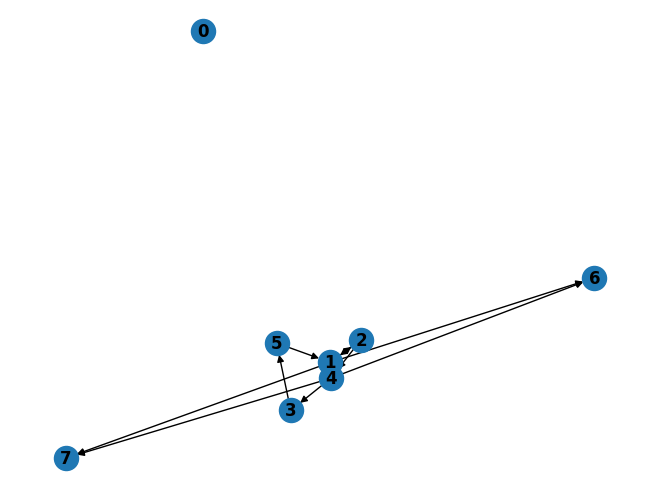

In [6]:
G = nx.gnp_random_graph(8, 0.2, directed=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [7]:
print(
f"""Los vértices de la digráfica son : {G.nodes}
Las aristas de la digráfica son: {G.edges}
Lista de los ingrados por cada vértice: {G.in_degree}
Lista de los exgrados por cada vértice: {G.out_degree}
Ingrado de un vértice en particular: {G.in_degree[1]}
Lista de vértices ex-vecinos  1: {list(G.successors(1))}
Lista de vértices ex-vecinos a 1, con atributos: {G.adj[1]}
Lista de flechas que entran a 2: {G.in_edges(2)}
Lista de in-vecinos de 2: {list(G.predecessors(2))}"""
)

Los vértices de la digráfica son : [0, 1, 2, 3, 4, 5, 6, 7]
Las aristas de la digráfica son: [(1, 2), (1, 6), (1, 7), (2, 1), (2, 4), (3, 5), (4, 3), (4, 6), (4, 7), (5, 1)]
Lista de los ingrados por cada vértice: [(0, 0), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2)]
Lista de los exgrados por cada vértice: [(0, 0), (1, 3), (2, 2), (3, 1), (4, 3), (5, 1), (6, 0), (7, 0)]
Ingrado de un vértice en particular: 2
Lista de vértices ex-vecinos  1: [2, 6, 7]
Lista de vértices ex-vecinos a 1, con atributos: {2: {}, 6: {}, 7: {}}
Lista de flechas que entran a 2: [(1, 2)]
Lista de in-vecinos de 2: [1]


# Accesibilidad y conexidad

Decimos que un vértice $v$ es **accesible** desde $u$ si existe un camino *dirigido* entre $u$ y $v$. Es importante notar dos cosas:

1. $u$ y $v$ pueden estar en la misma componente conexa, pero no ser accesibles uno desde el otro.

2. Que $v$ sea accesible desde $u$ no implica lo inverso.

A continuación, demostramos dos gráficas que ilustran estos puntos:

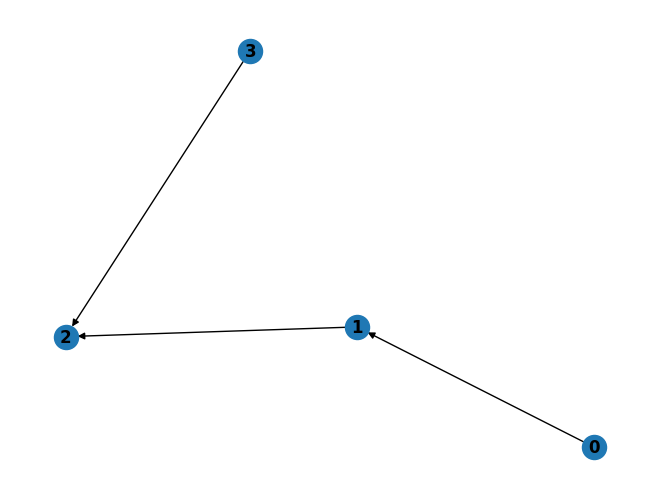

In [8]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (3,2)])
nx.draw(g, with_labels=True, font_weight='bold')

Podemos ver que todos los vértices están conectados, pero 0 no es accesible desde 3, y viceversa.

Por otro lado:

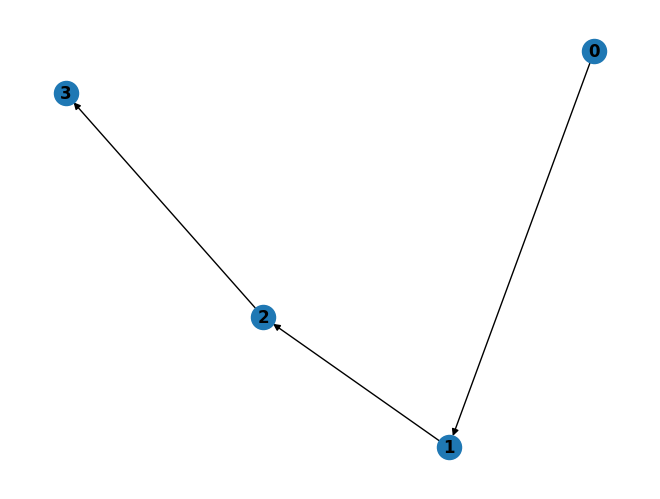

In [9]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (2,3)])
nx.draw(g, with_labels=True, font_weight='bold')

3 es accesible desde 0, pero no lo opuesto.

Se dice que $u$ y $v$ están *fuertemente conectados* si $u$ es accesible desde $v$, y $v$ desde $u$. Si cada par de vértices de una gráfica está fuertemente conectado, se dice que la gráfica entera es fuertemente conexa.

Para determinar si $v$ es accesible desde $u$, basta con hacer DFS usando $u$ como el nodo raíz. Si eventualmente visitamos a $v$, significa que sí lo es:

In [10]:
def is_reachable(g, inicial, final, visited = None):
    if visited is None:
        visited = [False] * len(g.nodes)
    visited[inicial] = True
    for u in g.adj[inicial]:
      if visited[final]:
        return True
      if not visited[u]:
        is_reachable(g, u, final, visited)
    return visited[final]


Usando nuestra gráfica anterior:

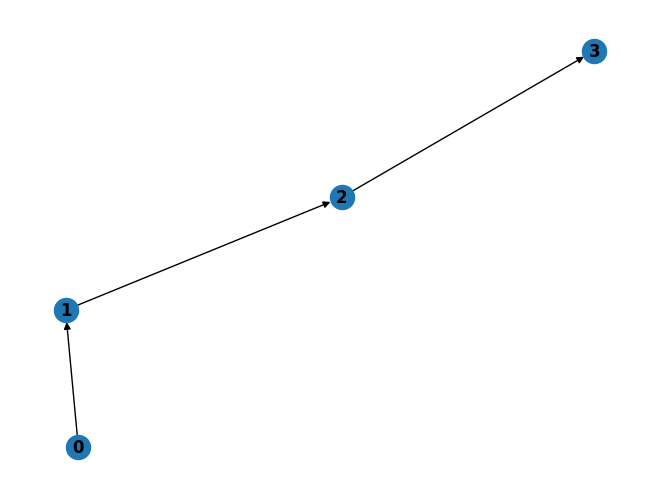

In [11]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (2,3)])
nx.draw(g, with_labels=True, font_weight='bold')

In [12]:
print(f"3 es accesible desde 0: {is_reachable(g, 0, 3)}")
print(f"0 es accesible desde 3: {is_reachable(g, 3, 0)}")

3 es accesible desde 0: True
0 es accesible desde 3: False


# Ordenamientos topológicos

Un ordenamiento topológico de los vértices de una gráfica dirigida cumple que, si existe una flecha del vértice $u$ al vértice $v$, entonces $u$ viene antes de $v$ en el ordenamiento.

Por ejemplo, tomando la siguiente gráfica:

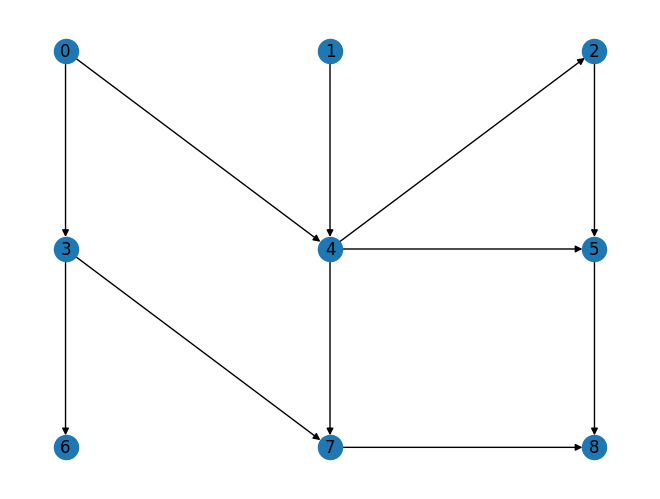

In [13]:
g = nx.DiGraph()
g.add_nodes_from([0,1,2,3,4,5,6,7,8])
g.add_edges_from([(0, 4), (0, 3), (2, 5), (1, 4), (4, 5), (3, 6), (4, 7), (3, 7), (4, 2), (5, 8), (7, 8)])
pos = {i: (i%3, 3-i//3*3) for i in g.nodes}
nx.draw(g, with_labels=True, pos=pos)

Algunos ordenamientos posibles son:

* 1, 0, 3, 6, 4, 2, 5, 7, 8
* 0, 1, 3, 4, 6, 7, 2, 5, 8
* 0, 3, 6, 1, 4, 2, 5, 7, 8

Una manera sencilla de comprobar si un ordenamiento es válido es colocar a todos los vértices en una fila, siguiendo el ordenamiento de izquierda a derecha. Si todas las aristas apuntan hacia la derecha, entonces es válido.

Definimos una pequeña función para generar un arreglo de posiciones para graficar dado un posible ordenamiento:

In [14]:
def pos_order(order):
    pos = {}
    for i, v in enumerate(order):
        pos[v] = (i,5)
    return pos

Aplicándolo a nuestros ordenamientos:

In [15]:
sorts = [
    [1, 0, 3, 6, 4, 2, 5, 7, 8],
    [0, 1, 3, 4, 6, 7, 2, 5, 8],
    [0, 3, 6, 1, 4, 2, 5, 7, 8]
]

{1: (0, 5), 0: (1, 5), 3: (2, 5), 6: (3, 5), 4: (4, 5), 2: (5, 5), 5: (6, 5), 7: (7, 5), 8: (8, 5)}
{0: (0, 5), 1: (1, 5), 3: (2, 5), 4: (3, 5), 6: (4, 5), 7: (5, 5), 2: (6, 5), 5: (7, 5), 8: (8, 5)}
{0: (0, 5), 3: (1, 5), 6: (2, 5), 1: (3, 5), 4: (4, 5), 2: (5, 5), 5: (6, 5), 7: (7, 5), 8: (8, 5)}


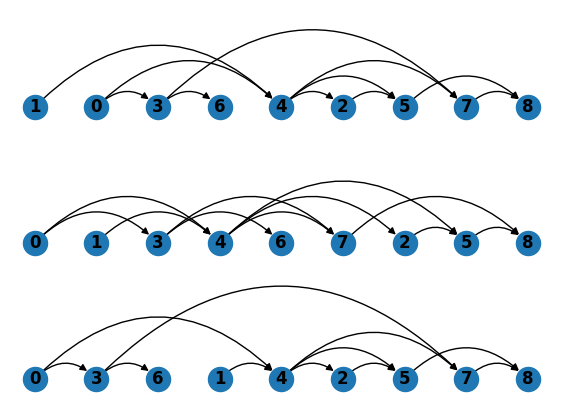

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(7, 5))
for i in range(3):
    pos = pos_order(sorts[i])
    print(pos)
    nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold', ax=ax[i])
    ax[i].margins(0, 0.2)

Aplicándolo a un ordenamiento inválido:

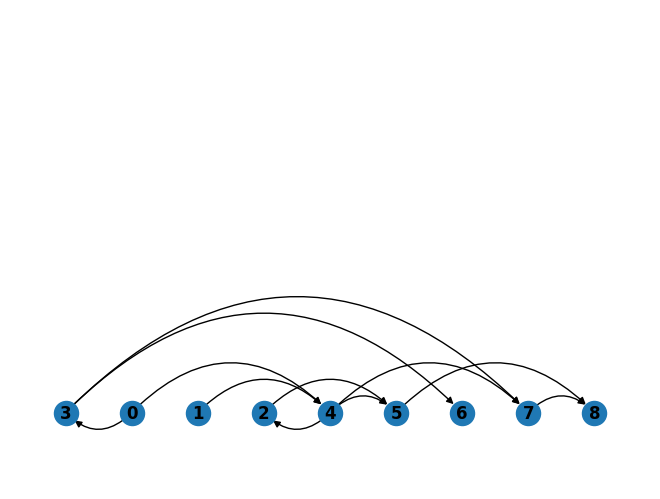

In [17]:
pos = pos_order([3,0,1,2,4,5,6,7,8])
nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

## Ciclos

Supongamos que tenemos una gráfica un ciclo de la forma $0\rightarrow 1 \rightarrow 2 \rightarrow 0$. Si queremos generar un ordenamiento para esta gráfica, tendremos un problema, ya que por definición $0$ tiene que venir antes que $1$, $1$ antes que $2$, y $2$ antes que $0$, lo cual claramente no es posible.

Por lo tanto, si una gráfica es ordenable, entonces no tiene ciclos. En la siguiente sección, veremos una prueba del converso (i.e., si la gráfica no tiene ciclos entonces es ordenable).

**DAG: Directed acyclic graph**

## DFS y ordenamientos

Como DFS visita cada vértice una única vez, es un candidato natural para generar órdenes topológicos. Tres maneras de listar (no ordenar!) los vértices usándolo son las siguientes:

* **Preorder**: Visitamos a un nodo *antes* de visitar a sus hijos.

* **Postorder**: Visitamos a un nodo *después* de visitar a sus hijos.

* **Reverse postorder**: Invertimos los resultados de postorder.

Implementamos el preorder y postorder:

In [18]:
def preorder_basic(g, v, visited=None, out=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    if out is None:
        out = []

    visited[v] = True
    # Visitamos al vértice ANTES de hacer las llamadas recursivas
    out.append(v)
    for u in g.adj[v]:
        if not visited[u]:
            preorder_basic(g, u, visited, out)
    return out

def postorder_basic(g, v, visited=None, out=None):
    if visited is None:
        visited = [False] * len(g.nodes)
    if out is None:
        out = []

    visited[v] = True
    for u in g.adj[v]:
        if not visited[u]:
            postorder_basic(g, u, visited, out)
    # Visitamos al vértice DESPUÉS de hacer las llamadas recursivas
    out.append(v)
    return out

Ejecutándolos:

In [19]:
preorder_basic(g, 0)

[0, 4, 5, 8, 7, 2, 3, 6]

In [20]:
postorder_basic(g, 0)

[8, 5, 7, 2, 4, 6, 3, 0]

Notamos que el vértice 1 no aparece en nuestros resultados. Esto se debe a que no es accesible desde el 0. Por lo tanto, escribimos un *wrapper* para asegurarnos que visite todos los vértices:

In [21]:
def preorder(g, v):
    visited = [False] * len(g.nodes)
    out = []
    for v in g.nodes:
        if not visited[v]:
            preorder_basic(g, v, visited, out)
    return out

def postorder(g, v):
    visited = [False] * len(g.nodes)
    out = []
    for v in g.nodes:
        if not visited[v]:
            postorder_basic(g, v, visited, out)
    return out

Volviendo a ejecutarlo:

In [22]:
preorder(g, 0)

[0, 4, 5, 8, 7, 2, 3, 6, 1]

In [23]:
postorder(g, 0)

[8, 5, 7, 2, 4, 6, 3, 0, 1]

Con esto, podemos escribir una función para obtener el reverse postorder:

In [24]:
def reverse_postorder(g, v):
    out = postorder(g, v)[::-1]
    return out

In [25]:
print(f"""Preorder: {preorder(g, 0)}
Postorder: {postorder(g, 0)}
Reverse postorder: {reverse_postorder(g, 0)}""")

Preorder: [0, 4, 5, 8, 7, 2, 3, 6, 1]
Postorder: [8, 5, 7, 2, 4, 6, 3, 0, 1]
Reverse postorder: [1, 0, 3, 6, 4, 2, 7, 5, 8]


**Proposición:** Reverse postorder genera un ordenamiento topológico para una gráfica acíclica.

**Demostración:** Observemos el código de *postorder_basic* y supongamos que se está ejecutando *postorder_basic(x)*.

Supongamos que la iteración sobre los ex-vecinos de $x$ ha terminado y $out = [v_{i_1}, ..., v_{i_j}]$.

Eso significa que los ex-vecinos de $x$ deben encontrarse forsozamente en el conjunto $\{v_{i_1}, ..., v_{i_j}\}$.
Así, al correr $out.append(x)$ terminamos con la lista
$$out = [v_{i_1}, ..., v_{i_j}, x]$$

De donde se sigue que todas las ex-flechas de $x$ apuntan a vértices detrás de él en la lista. Como esto sucede para cada vértice $x$ de la digráfica, al obtener la lista $out$ al finalizar el algoritmo, tenemos que para todo vértice $v$ se tiene que sus ex-flechas apuntan hacia atrás.

Luego entonces, *reverse(out)* es un ordenamiendo donde todas las flechas apuntan hacia adelante.

---

Comprobemos de manera gráfica que el reverse postorder efectivamente genera un ordenamiento topológico válido. Lo comparamos con las otras maneras de listar los vértices:

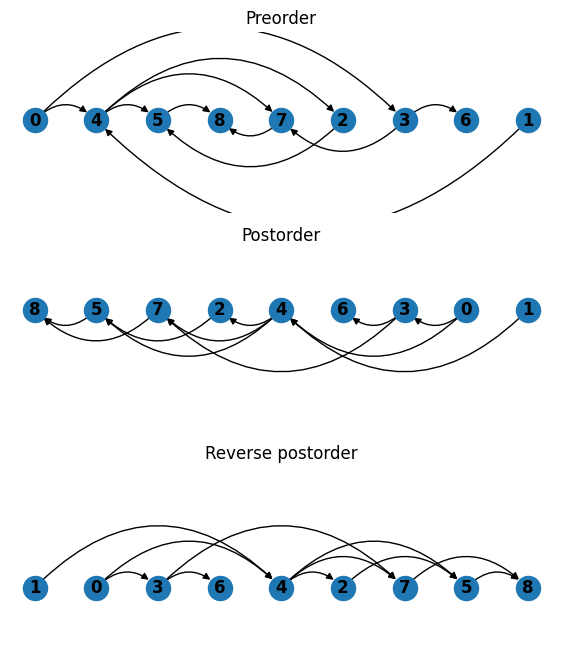

In [26]:
lists = [preorder(g, 0), postorder(g, 0), reverse_postorder(g, 0)]
names = ["Preorder", "Postorder", "Reverse postorder"]

fig, ax = plt.subplots(3, 1, figsize=(7, 8))
for i in range(3):
    pos = pos_order(lists[i])
    nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold', ax=ax[i])
    ax[i].margins(0, 1)
    ax[i].set_title(names[i])

Notamos que tanto en el postorder como el reverse postorder, todas las flechas apuntan hacia una misma dirección. Sin embargo, hay que recordar que en un ordenamiento válido, deben de apuntar hacia la **derecha**.

# Gráficas planares

NetworkX tiene funciones ya integradas que nos permiten tanto checar si la gráfica es aplanable o no, y también nos muestra un encaje planar (del inglés, planar embedding) de la gráfica en caso de que esta sea aplanable.

Aplanable


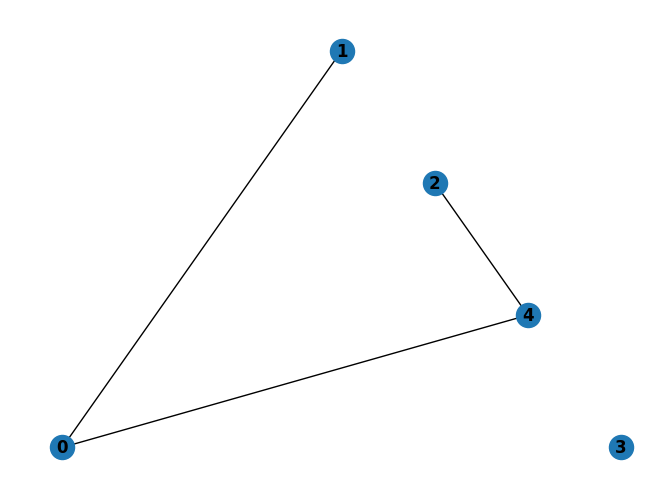

In [27]:
a = 5
b = 0.8
PL = nx.gnp_random_graph(a, b)

if nx.check_planarity(PL)[0]:
    print("Aplanable")
    nx.draw_planar(PL, with_labels=True, font_weight='bold')
else:
    print("No es aplanable")
    nx.draw(PL, with_labels=True, font_weight='bold')

## Ejercicios

## Ejercicio 1

Escribe una función para determinar si un ordenamiento dado en forma de una lista de vértices $[v_1, v_2, \ldots, v_n]$ es un ordenamiento topológico.

Para cada nodo $v \in V$, se revisan todos los nodos $u \in N(v)$ (vecinos de $v$). En un arreglo topológico, debe cumplirse que todos los vecinos de $v$ están más a la derecha de $v$ en el arreglo; entonces, si el índice (en el ordenamiento) de algún nodo $v$ es mayor al de alguno de sus vecinos, el arreglo no es topológico.

In [28]:
def is_topological(G, order):
    for v in G.nodes:
        for u in G.adj[v]:
            if order.index(v) > order.index(u):
                return False
    return True

In [29]:
print(sorts[0])
is_topological(g, sorts[0])

[1, 0, 3, 6, 4, 2, 5, 7, 8]


True

In [30]:
print(sorts[1])
is_topological(g, sorts[1])

[0, 1, 3, 4, 6, 7, 2, 5, 8]


True

In [31]:
print(sorts[2])
is_topological(g, sorts[2])

[0, 3, 6, 1, 4, 2, 5, 7, 8]


True

In [32]:
is_topological(g, [3,0,1,2,4,5,6,7,8])

False

## Ejercicio 2

Como vimos anteriormente, una DAG (gráfica dirigida acíclica) puede tener múltiples ordenamientos topológicos. Escribe una función que determine si una DAG tiene un único ordenamiento. Compara tu resultado con lo obtenido con `nx.all_topological_sorts`.

Asumiendo que los nodos no pueden repetirse en el grafo, revisamos todos los posibles arreglos con los nodos del grafo. Para cada posible arreglo, usamos la función `is_topological()` del ejercicio anterior para saber si un arreglo es topológico. El algoritmo consiste en revisar todos los posibles arreglos y contar todos aquellos arreglos topológicos válidos. Si la cuenta final fue más de 1, regresa `False`. Caso contrario, `True`.

In [37]:
import itertools

In [38]:
def top_sort_is_unique(G):
    count = sum(1 for sort in itertools.permutations(G.nodes) if is_topological(G, sort))
    return count == 1

In [39]:
top_sort_is_unique(g)

False

In [34]:
list(nx.all_topological_sorts(g))

[[1, 0, 3, 6, 4, 2, 5, 7, 8],
 [1, 0, 3, 6, 4, 2, 7, 5, 8],
 [1, 0, 3, 6, 4, 7, 2, 5, 8],
 [1, 0, 3, 4, 2, 5, 7, 8, 6],
 [1, 0, 3, 4, 2, 5, 7, 6, 8],
 [1, 0, 3, 4, 2, 5, 6, 7, 8],
 [1, 0, 3, 4, 2, 7, 6, 5, 8],
 [1, 0, 3, 4, 2, 7, 5, 8, 6],
 [1, 0, 3, 4, 2, 7, 5, 6, 8],
 [1, 0, 3, 4, 2, 6, 5, 7, 8],
 [1, 0, 3, 4, 2, 6, 7, 5, 8],
 [1, 0, 3, 4, 7, 6, 2, 5, 8],
 [1, 0, 3, 4, 7, 2, 5, 8, 6],
 [1, 0, 3, 4, 7, 2, 5, 6, 8],
 [1, 0, 3, 4, 7, 2, 6, 5, 8],
 [1, 0, 3, 4, 6, 2, 5, 7, 8],
 [1, 0, 3, 4, 6, 2, 7, 5, 8],
 [1, 0, 3, 4, 6, 7, 2, 5, 8],
 [1, 0, 4, 2, 5, 3, 7, 8, 6],
 [1, 0, 4, 2, 5, 3, 7, 6, 8],
 [1, 0, 4, 2, 5, 3, 6, 7, 8],
 [1, 0, 4, 2, 3, 7, 6, 5, 8],
 [1, 0, 4, 2, 3, 7, 5, 8, 6],
 [1, 0, 4, 2, 3, 7, 5, 6, 8],
 [1, 0, 4, 2, 3, 6, 5, 7, 8],
 [1, 0, 4, 2, 3, 6, 7, 5, 8],
 [1, 0, 4, 2, 3, 5, 7, 8, 6],
 [1, 0, 4, 2, 3, 5, 7, 6, 8],
 [1, 0, 4, 2, 3, 5, 6, 7, 8],
 [1, 0, 4, 3, 7, 6, 2, 5, 8],
 [1, 0, 4, 3, 7, 2, 5, 8, 6],
 [1, 0, 4, 3, 7, 2, 5, 6, 8],
 [1, 0, 4, 3, 7, 2, 6, 5, 8],
 [1, 0, 4,

Tomamos un grafo con arreglo topológico único:

In [43]:
g2 = nx.DiGraph()
g2.add_edges_from([(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8)])

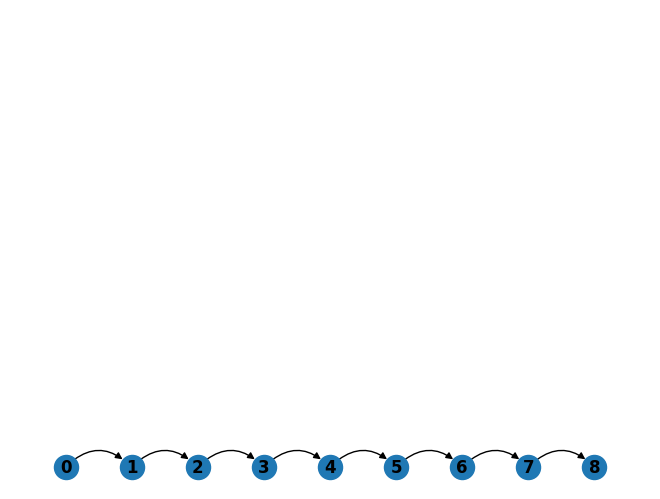

In [47]:
pos = pos_order([0,1,2,3,4,5,6,7,8])
nx.draw(g2, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

In [45]:
top_sort_is_unique(g2)

True